### 課題 Assignment

### 1. パッケージをインポートする Import packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 確率変数と確率分布をファイルから読み込む Load the R.V. and probability 

In [27]:
df = pd.read_csv("data/rand_distribution.csv", sep=",", header=0)


,X,P
0,1,0.004439
1,2,0.008038
2,3,0.013674
3,4,0.021851
4,5,0.032802


### 辞書型に変換　Convert to dictionary type

In [14]:
count = dict(df.to_numpy())

### 2. 棒グラフを使って確率分布を図示しなさい Plot the probability distribution by using a bar graph

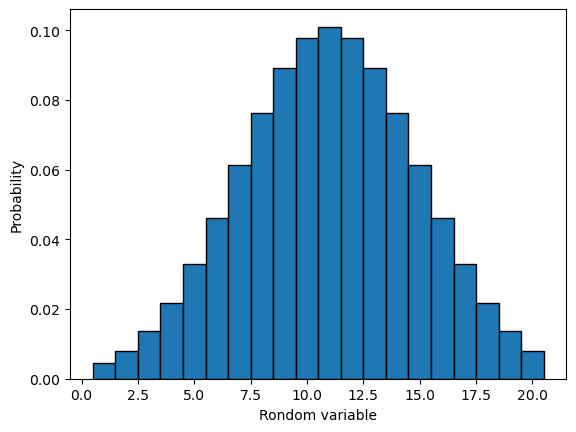

In [15]:
plt.bar(count.keys(), count.values(), width=1, ec='black' )
plt.xlabel("Rondom variable")
plt.ylabel("Probability")
plt.show()

### 3. 累積分布を定義しなさい Define a function of the CDF

In [16]:
def Cdf(dist, x):
    prob = 0.0
    for value in dist.keys():
        if value <= x:
            prob += dist[value]
    return prob

###  累積分布を求めなさい Calculate the CDF

In [17]:
cdf_dis ={}
for x in range(0,19):
    cdf = Cdf(count, x)
    cdf_dis[x] = cdf

###  累積分布を図示しなさい Plot the CDF

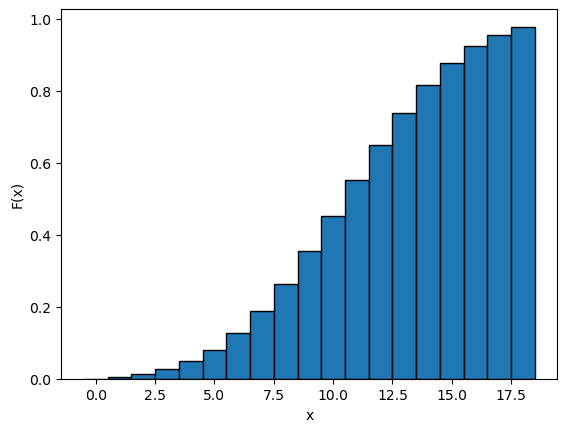

In [18]:
plt.bar(cdf_dis.keys(), cdf_dis.values(), width=1, ec='black' )
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### 4. 期待値を求める関数を定義しなさい Define a function of expected value

In [19]:
def Expect(dist):
    e = sum([x*p for x,p in dist.items()])
    return e

###  分散を求める関数を定義しなさい Define a function of variance

In [20]:
def Variance(dist):
    e = Expect(dist)
    var = sum([(x-e)**2 * p for x,p in dist.items()])
    return var

###  標準偏差を求める関数を定義しなさい Define a function of standard deviation

In [21]:
def Std(dist):
    std = np.sqrt(Variance(dist))
    return std

###  期待値、分散、標準偏差を求めなさい Calculate the expected value, variance and standard deviation

In [23]:
print("{:.1f}".format(Expect(count)))
print("{:.1f}".format(Variance(count)))
print("{:.1f}".format(Std(count)))

11.0
14.6
3.8


###  標準化変数を求める関数を定義しなさい Define a function of z-score normalization

In [24]:
def Zscore(dist):
    z = [(x-Expect(dist))/Std(dist) for x in dist.keys()]
    normalized_dist = dict(zip(z, dist.values()))
    return normalized_dist

###  標準化変数を求め、標準化後の期待値、分散、標準偏差を求めなさい Calculate the expected value, variance and standard deviation of the normalized probability distribution

In [25]:
z = Zscore(count)
print("{:.1f}".format(Expect(z)))
print("{:.1f}".format(Variance(z)))
print("{:.1f}".format(Std(z)))

0.0
1.0
1.0


### 6. 標準化変数を求め、標準化後の確率分布を図示しなさい Plot the normalized probability distribution

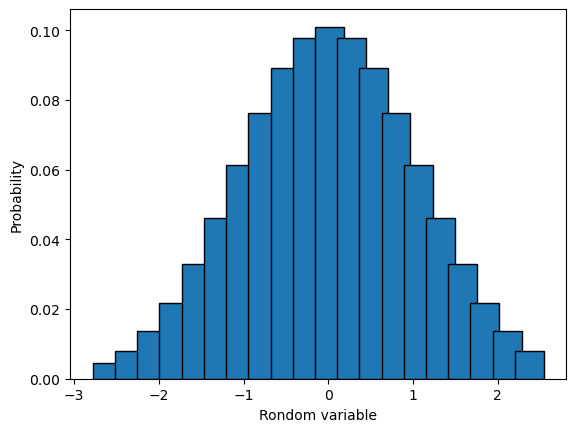

In [26]:
plt.bar(z.keys(), z.values(), width=0.34,ec='black' )
plt.xlabel("Rondom variable")
plt.ylabel("Probability")
plt.show()